In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import numpy as np
import pandas as pd
import scipy.stats
import colors as EL

%matplotlib inline

In [2]:
df = pd.read_csv('./data/trajectories/cleaned_animal_analyses_diffs.csv')
df = df[df['dead'] != 'yes']
assert len(df) == len(df["animal_ID"].unique()), "Animal IDs are not unique!"

# Split dataframe by species
aegypti = df[df['species'].str.upper() == 'AEDES AEGYPTI'].copy()
albopictus = df[df['species'].str.upper() == 'AEDES ALBOPICTUS'].copy()
arabiensis = df[df['species'].str.upper() == 'ANOPHELES ARABIENSIS'].copy()
coluzzii = df[df['species'].str.upper() == 'ANOPHELES GAMBIAE'].copy()
quinque = df[df['species'].str.upper() == 'CULEX QUINQUEFASCIATUS'].copy()
tarsalis = df[df['species'].str.upper() == 'CULEX TARSALIS'].copy()

treats = ['100ul_milliQ_water', '100ul_quinine', '05_percent_food']
species = [aegypti, albopictus, arabiensis, coluzzii, quinque, tarsalis]
color = [EL.aegypti, EL.albopictus, EL.arabiensis, EL.coluzzii, EL.culex_q, EL.culex_t]

In [3]:
def plot_values(fig, ax, value, ylim):
    
    aegypti_v = aegypti[value].tolist()
    albopictus_v = albopictus[value].tolist()
    arabiensis_v = arabiensis[value].tolist()
    coluzzii_v = coluzzii[value].tolist()
    tarsalis_v = tarsalis[value].tolist()
    quinque_v = quinque[value].tolist()
    
    check = df[value].tolist()
    print('Min:', min(check), 'Max:', max(check), value)
    data = []
    jitter = []
    colors = []
    
    for i, sp in enumerate(species): 
        for treat in treats: 
            temp = sp[sp['treatment_odor'] == treat]
            temp = temp[value].tolist()
            data.append(temp)
            jitter.append(np.random.normal(scale=0.1, size=len(temp)))
            colors.append(color[i])

    parts = ax.violinplot(data, showmeans=False, showmedians=False, showextrema=False)

    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.25)
        
    for i, (j, d) in enumerate(zip(jitter, data)):
        j = [x+i+1 for x in j]
        ax.scatter(j, d, alpha=0.75, color=colors[i], zorder=5, s=4, 
                     marker='o', clip_on=False, lw=0)
    
    ax.set_ylim(ylim[0], ylim[-1])
    ax.set_yticks(ylim)
    ax.set_yticklabels(ylim)
    
    # Color the x axis labels by species
    ax.set_xlim(0.25, len(data)+0.75)
    ax.set_xticks(np.arange(1, len(data)+1, 1))
    ax.set_xticklabels(['W', 'Q', 'F']*int(len(data)/3))
    ax.axhline(y=0, xmin=0, xmax=1, color='k', alpha=0.5, zorder=50)
    
    # Add a black bar for the mean of each dataset
    ch = 0.15
    for i, datum in enumerate(data):
            ax.plot([i+1-ch, i+1+ch], [np.mean(datum)]*2, color="k", 
                    alpha=0.75, lw=2, zorder=20, clip_on=False, solid_capstyle='round')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    return fig, ax

Min: -48.2202447163515 Max: 72.74377906742559 D_time_move_p
Min: -4.037902174612259 Max: 3.5933618324437973 D_total_dist_m
Min: -2.735297412655439 Max: 1.0394480695760964 D_avg_speed_BL
Min: -15.510482668597872 Max: 10.703893851483405 D_max_speed_BL
Min: -2.4696747281347364 Max: 0.9358569989238512 D_mean_speed_first_BL
Min: -1.1698079605816996 Max: 2.328852045933406 D_diff_speed_first_last_BL
Min: -12.601033026482535 Max: 8.019489608597526 D_sharp_turns_p
Min: -556.0 Max: 796.5 D_max_still_sec
Min: -26 Max: 41 D_spirals
Min: -121 Max: 167 D_continuous


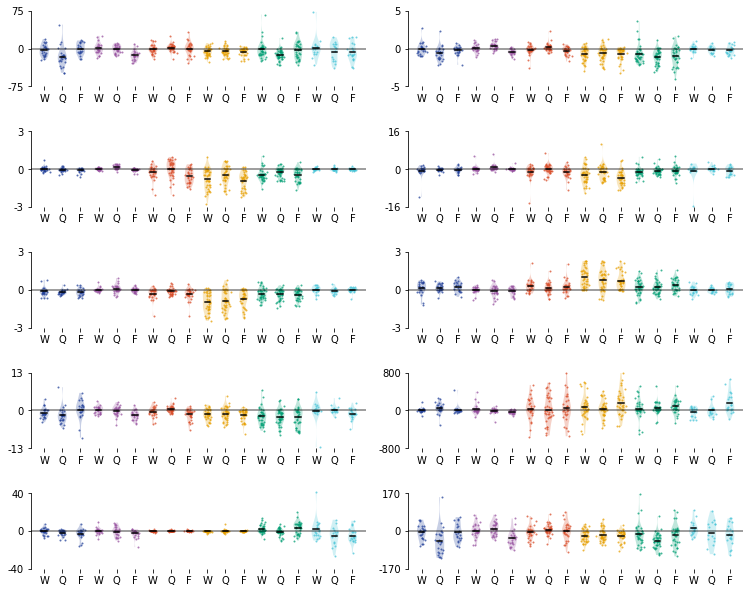

In [4]:
savename = './figures/FigS2.pdf'

fig = plt.figure(figsize = (6*1.65, 7.75))
ax1 = fig.add_subplot(5, 2, 1)
ax2 = fig.add_subplot(5, 2, 2)
ax3 = fig.add_subplot(5, 2, 3)
ax4 = fig.add_subplot(5, 2, 4)
ax5 = fig.add_subplot(5, 2, 5)
ax6 = fig.add_subplot(5, 2, 6)
ax7 = fig.add_subplot(5, 2, 7)
ax8 = fig.add_subplot(5, 2, 8)
ax9 = fig.add_subplot(5, 2, 9)
ax10 = fig.add_subplot(5, 2, 10)

fig, ax1 = plot_values(fig, ax1, 'D_time_move_p', ylim=np.arange(-75, 76, 75))
fig, ax2 = plot_values(fig, ax2, 'D_total_dist_m', ylim=np.arange(-5, 6, 5))
fig, ax3 = plot_values(fig, ax3, 'D_avg_speed_BL', ylim=np.arange(-3, 4, 3))
fig, ax4 = plot_values(fig, ax4, 'D_max_speed_BL', ylim=np.arange(-16, 17, 16))
fig, ax5 = plot_values(fig, ax5, 'D_mean_speed_first_BL', ylim=np.arange(-3, 4, 3))
fig, ax6 = plot_values(fig, ax6, 'D_diff_speed_first_last_BL', ylim=np.arange(-3, 4, 3))
fig, ax7 = plot_values(fig, ax7, 'D_sharp_turns_p', ylim=np.arange(-13, 14, 13))
fig, ax8 = plot_values(fig, ax8, 'D_max_still_sec', ylim=np.arange(-800, 801, 800))
fig, ax9 = plot_values(fig, ax9, 'D_spirals', ylim=np.arange(-40, 41, 40))
fig, ax10 = plot_values(fig, ax10, 'D_continuous', ylim=np.arange(-170, 171, 170))

# Remove padding and margins from the figure and all its subplots
plt.margins(0,0)
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0.6, wspace=0.125)
plt.show()

# Save the Matplotlib figure as a PDF file:
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()